In [8]:
import pandas as pd
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import numpy as np
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
file_path = '/content/gdrive/MyDrive/Rathbun lab GDrive/Prof Rathbun/BRET efficiencies/gly linkers combined.xlsx'
df = pd.read_excel(file_path)
df = df.melt(id_vars=['Peptide', 'Wavelength'], var_name='Trial', value_name='Luminescence')

In [10]:
# set the dtype for D5 and Wavel. to int64
df['Luminescence'] = df['Luminescence'].astype('int64')
df['Wavelength'] = df['Wavelength'].astype('int64')

<Axes: xlabel='Wavelength', ylabel='Luminescence'>

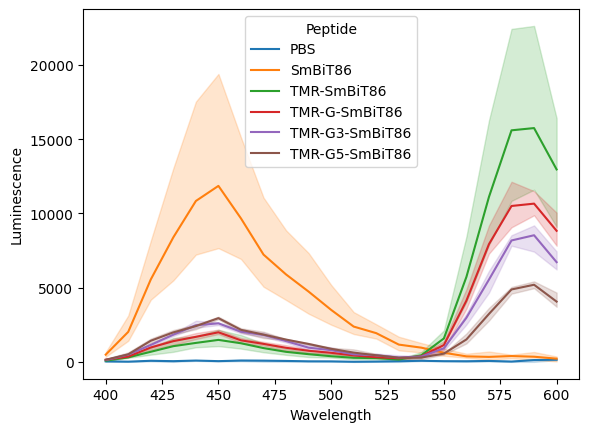

In [11]:
sns.lineplot(data=df, x='Wavelength', y='Luminescence', hue='Peptide')

In [15]:
def extrapolate(df, x_col, y_col, start=-2, stop=None):
  df[y_col] = df[y_col].astype('float64')
  df[x_col] = df[x_col].astype('float64')

  # extrapolate the final point
  y = df[y_col][start:stop].values
  x = df[x_col][start:stop].values
  print(x,y)
  m, b = np.polyfit(x, y, 1)

  # find the x intercept
  x_intercept = -b/m
  extrap_y = m*x_intercept + b

  x = np.append(df[x_col].values, x_intercept)
  y = np.append(df[y_col].values, extrap_y)

  return x, y

def trapezoidal_int(x, y, cutoff):
  all = integrate.trapezoid(y, x)
  lgbit = integrate.trapezoid(y[:cutoff], x[:cutoff])
  bret = integrate.trapezoid(y[cutoff:], x[cutoff:])
  efficiency = bret/all
  print("Total: ",all)
  print("LG-bit: ",lgbit)
  print("BRET: ",bret)
  print("Efficiency: ",efficiency)
  return all, lgbit, bret, efficiency

In [22]:
d = {
    'Peptide': [],
    'Trial': [],
    'Total': [],
    'LG-bit': [],
    'BRET': [],
    'Efficiency': []
}
for peptide in df['Peptide'].unique():
  for trial in df['Trial'].unique():
    print(peptide, trial)
    df_temp = df[(df['Peptide'] == peptide) & (df['Trial'] == trial)]
    x, y = extrapolate(df_temp, 'Wavelength', 'Luminescence')
    all, lgbit, bret, efficiency = trapezoidal_int(x, y, 14)
    d['Peptide'].append(peptide)
    d['Trial'].append(trial)
    d['Total'].append(all)
    d['LG-bit'].append(lgbit)
    d['BRET'].append(bret)
    d['Efficiency'].append(efficiency)

brets = pd.DataFrame(d)
brets

[590. 600.] [188. 120.]
Total:  18703.82352941173
LG-bit:  10745.0
BRET:  6643.823529411729
Efficiency:  0.35521205164090264
[590. 600.] [  6. 155.]
Total:  6213.791946308734
LG-bit:  3835.0
BRET:  2058.7919463087337
Efficiency:  0.3313261795853572
[590. 600.] [189. 177.]
Total:  24673.74999999968
LG-bit:  6690.0
BRET:  17698.74999999968
Efficiency:  0.7173109073407937
[590. 600.] [143. 261.]
Total:  582383.5169491526
LG-bit:  558385.0
BRET:  15663.516949152588
Efficiency:  0.026895536177271577
[590. 600.] [243.  38.]
Total:  557720.2195121951
LG-bit:  528370.0
BRET:  20575.21951219512
Efficiency:  0.036891650674223446
[590. 600.] [670. 367.]
Total:  1217392.590759076
LG-bit:  1158990.0
BRET:  43542.59075907585
Efficiency:  0.03576709032862268
[590. 600.] [13020. 10350.]
Total:  755228.9325842641
LG-bit:  80215.0
BRET:  672788.9325842641
Efficiency:  0.8908410464123714
[590. 600.] [11600.  9097.]
Total:  639492.4430683135
LG-bit:  68720.0
BRET:  568087.4430683135
Efficiency:  0.8883411

/tmp/ipython-input-15-1007603897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[y_col] = df[y_col].astype('float64')
/tmp/ipython-input-15-1007603897.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x_col] = df[x_col].astype('float64')
/tmp/ipython-input-15-1007603897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,Peptide,Trial,Total,LG-bit,BRET,Efficiency
0,PBS,Trial 1,1.870382e+04,10745.0,6.643824e+03,0.355212
1,PBS,Trial 2,6.213792e+03,3835.0,2.058792e+03,0.331326
2,PBS,Trial 3,2.467375e+04,6690.0,1.769875e+04,0.717311
3,SmBiT86,Trial 1,5.823835e+05,558385.0,1.566352e+04,0.026896
4,SmBiT86,Trial 2,5.577202e+05,528370.0,2.057522e+04,0.036892
5,SmBiT86,Trial 3,1.217393e+06,1158990.0,4.354259e+04,0.035767
6,TMR-SmBiT86,Trial 1,7.552289e+05,80215.0,6.727889e+05,0.890841
7,TMR-SmBiT86,Trial 2,6.394924e+05,68720.0,5.680874e+05,0.888341
8,TMR-SmBiT86,Trial 3,1.546743e+06,129155.0,1.413308e+06,0.913732
9,TMR-G-SmBiT86,Trial 1,5.791549e+05,111295.0,4.649649e+05,0.802833


In [25]:
# find the means across trials
brets_mean = brets.groupby('Peptide').mean(numeric_only=True)
brets_mean

,Total,LG-bit,BRET,Efficiency
Peptide,,,,
PBS,16530.455159,7090.000000,8800.455159,0.467950
SmBiT86,785832.109073,748581.666667,26593.775740,0.033185
TMR-G-SmBiT86,767018.034688,123670.000000,640203.034688,0.830841
TMR-G3-SmBiT86,608022.412816,167426.666667,437264.079483,0.718170
TMR-G5-SmBiT86,444947.073767,181976.666667,260050.407100,0.578693
TMR-SmBiT86,980487.992575,92696.666667,884727.992575,0.897638


In [28]:
df[df['Wavelength']==590].groupby('Peptide').mean(numeric_only=True)

,Wavelength,Luminescence
Peptide,,
PBS,590.0,127.666667
SmBiT86,590.0,352.000000
TMR-G-SmBiT86,590.0,10661.666667
TMR-G3-SmBiT86,590.0,8532.666667
TMR-G5-SmBiT86,590.0,5199.000000
TMR-SmBiT86,590.0,15749.666667
